In [1]:
from pylab import imshow
import numpy as np
import cv2
import torch
import albumentations as albu

In [2]:
from iglovikov_helper_functions.utils.image_utils import load_rgb, pad, unpad
from iglovikov_helper_functions.dl.pytorch.utils import tensor_from_rgb_image

In [3]:
from people_segmentation.pre_trained_models import create_model

In [4]:
model = create_model("Unet_2020-07-20")

/home/pcwork/anaconda3/lib/python3.7/site-packages/torch/hub.py:513: UserWarning: Falling back to the old format < 1.6. This support will be deprecated in favor of default zipfile format introduced in 1.6. Please redo torch.save() to save it in the new zipfile format.
  warnings.warn('Falling back to the old format < 1.6. This support will be '


In [5]:
#model.to(torch.device("cuda"))  
model.eval();

In [113]:
image = load_rgb("demo.jpg")
print ( image.shape)
#image = cv2.imread("/home/pcwork/011.jpg")
#image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

(800, 600, 3)


(800, 600, 3)


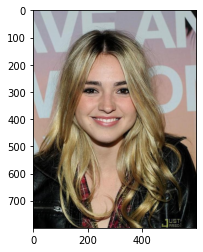

In [114]:
print (image.shape)
imshow(image)

In [82]:
transform = albu.Compose([albu.Normalize(p=1)], p=1)

In [83]:
padded_image, pads = pad(image, factor=32, border=cv2.BORDER_CONSTANT)

In [84]:
x = transform(image=padded_image)["image"]
x = torch.unsqueeze(tensor_from_rgb_image(x), 0)
x.shape

torch.Size([1, 3, 800, 608])

In [85]:
with torch.no_grad():
  prediction = model(x)[0][0]

In [86]:
mask = (prediction > 0).cpu().numpy().astype(np.uint8)

In [90]:
alpha = unpad(mask, pads)

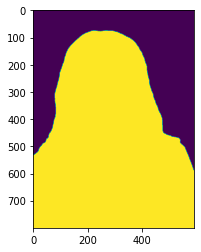

In [109]:
#mask = cv2.cvtColor(mask,cv2.COLOR_RGB2GRAY)
imshow(alpha)

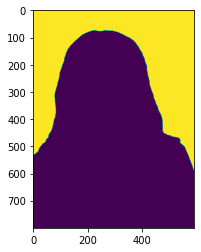

In [111]:
my = 1 - alpha
imshow ( my)

In [15]:
dst = cv2.addWeighted(image, 1, (cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB) * (0, 255, 0)).astype(np.uint8), 0.5, 0)

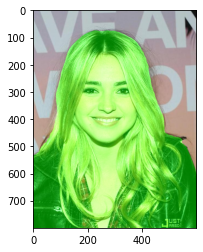

In [93]:
image = cv2.cvtColor(dst,cv2.COLOR_RGB2BGR)
imshow(dst)

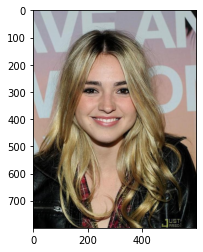

In [115]:
imshow(image)

error: OpenCV(4.5.2) /tmp/pip-req-build-947ayiyu/opencv/modules/core/src/arithm.cpp:647: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'arithm_op'


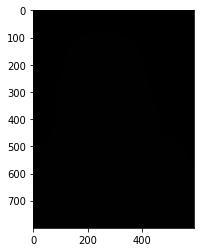

In [126]:
image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
alpha = cv2.cvtColor(alpha,cv2.COLOR_RGB2BGR)
imshow(alpha)
ben= cv2.addWeighted(image,2,alpha,1.2,0) 

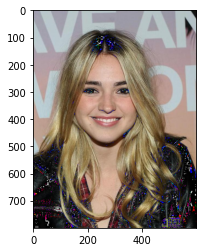

In [129]:
imshow(ben+image)

In [136]:
background = cv2.imread('background.jpeg')
h,w,_= background.shape 
if h
background =cv2.resize(background,(1920))
print ( background.shape)
imshow(background)


error: OpenCV(4.5.2) :-1: error: (-5:Bad argument) in function 'resize'
> Overload resolution failed:
>  - Can't parse 'dsize'. Input argument doesn't provide sequence protocol
>  - Can't parse 'dsize'. Input argument doesn't provide sequence protocol
